# Библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

# Загрузка данных

In [4]:
train = pd.read_csv('../data/processed/preprocessed_data.csv', low_memory=False)

# EDA

### Главной цель разведовательного анализа будет сокращение количества признаков путем рассмотрения их влияние на значение таргета. Хочется отметиться, что я постараюсь не брать во внимание заведомо полезные колокни, по типу среднего месячного и годового дохода, так как и так понятно, что они играют далеко не последнюю роль в кредитном рейтинге клиента

In [5]:
train.drop('SSN', axis=1).corr()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,unknown,Bad,Good,NoData,Standard
Month,1.000000,0.016253,-0.000737,-0.003615,-0.002423,-0.005837,0.003535,0.000724,-0.000140,0.000244,...,-0.000471,-0.004033,0.002578,-0.002305,0.004911,0.004233,-0.001764,0.001368,0.001419,-0.000966
Age,0.016253,1.000000,0.010547,0.005223,0.079153,0.000758,-0.006757,-0.000797,-0.007661,-0.167074,...,0.011315,-0.001154,0.002959,0.001872,-0.029012,-0.002544,-0.154288,0.175906,0.000677,-0.031664
Occupation,-0.000737,0.010547,1.000000,-0.001040,0.004267,-0.000291,0.001418,0.004840,0.000488,-0.008040,...,0.004317,-0.007798,0.000994,0.002001,-0.000911,0.001558,-0.009780,-0.007606,0.001178,0.013766
Annual_Income,-0.003615,0.005223,-0.001040,1.000000,0.027478,-0.005188,0.001813,-0.002336,0.002216,-0.011101,...,-0.002133,-0.001994,0.002346,0.003647,-0.009052,-0.001210,0.000036,0.010001,-0.001172,-0.007966
Monthly_Inhand_Salary,-0.002423,0.079153,0.004267,0.027478,1.000000,-0.010319,-0.004857,-0.005572,-0.009134,-0.227726,...,0.076021,-0.008415,-0.024778,0.035091,-0.241588,0.000886,-0.201890,0.240696,-0.005358,-0.045602
Num_Bank_Accounts,-0.005837,0.000758,-0.000291,-0.005188,-0.010319,1.000000,-0.002216,-0.003998,-0.000372,0.015966,...,0.000091,-0.002677,0.004236,-0.001702,0.001798,0.000384,0.007559,-0.014760,0.001283,0.005929
Num_Credit_Card,0.003535,-0.006757,0.001418,0.001813,-0.004857,-0.002216,1.000000,-0.004012,0.001884,0.008715,...,-0.001396,-0.003603,-0.003342,0.001809,0.006069,0.000437,0.005274,-0.007045,0.001649,0.000608
Interest_Rate,0.000724,-0.000797,0.004840,-0.002336,-0.005572,-0.003998,-0.004012,1.000000,0.001041,0.009792,...,0.001636,0.004936,0.007409,0.002833,-0.006903,-0.001011,0.009533,-0.003109,-0.005896,-0.000079
Num_of_Loan,-0.000140,-0.007661,0.000488,0.002216,-0.009134,-0.000372,0.001884,0.001041,1.000000,0.011881,...,-0.005885,0.001651,0.003085,-0.002214,0.000526,0.003625,0.017262,-0.013696,0.000527,-0.002295
Delay_from_due_date,0.000244,-0.167074,-0.008040,-0.011101,-0.227726,0.015966,0.008715,0.009792,0.011881,1.000000,...,-0.022692,-0.003538,0.000764,-0.007530,0.076357,-0.000030,0.567089,-0.421206,0.000677,-0.087137


### Можно выделить, что тип работы никак не влияет на остальные колоники; На таргет особенно
### Посмотрим распределение таргета по работам

<Axes: xlabel='Occupation', ylabel='Credit_Score'>

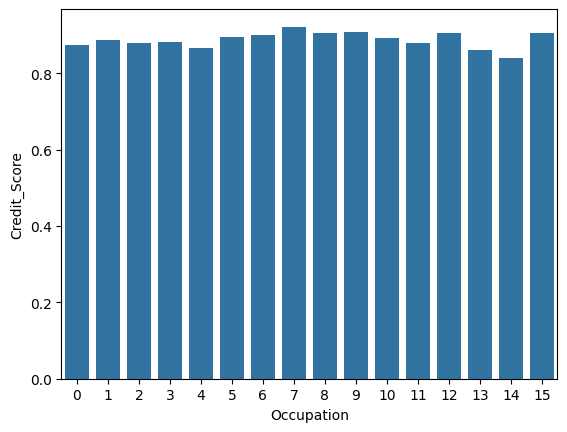

In [26]:
sns.barplot(x=train.groupby('Occupation')['Credit_Score'].mean().index, y=train.groupby('Occupation')['Credit_Score'].mean())

### Предположение оказалось верным, так что можем удалить эту колонку

In [27]:
train = train.drop('Occupation', axis=1)

### Колонки Annual_Income и Monthly_Inhand_Salary связанны, так что можно удалить одну из них - например ту, которая отображает годовой заработок

In [28]:
train = train.drop('Annual_Income', axis=1)

### Удалим некоторы колонки, которые слабо коррелируют со всеми остальными

In [29]:
train = train.drop(['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate'], axis=1)

### Обновим состояние картинки матрицы корреляций, чтобы не смотреть на старые значения

In [30]:
train.drop('SSN', axis=1).corr()

,Month,Age,Monthly_Inhand_Salary,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,...,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,unknown,Bad,Good,NoData,Standard
Month,1.000000,0.016253,-0.002423,-0.000140,0.000244,-0.002765,-0.000874,0.004823,0.000085,0.002440,...,-0.000471,-0.004033,0.002578,-0.002305,0.004911,0.004233,-0.001764,0.001368,0.001419,-0.000966
Age,0.016253,1.000000,0.079153,-0.007661,-0.167074,0.000303,-0.148386,-0.006509,-0.194330,0.023687,...,0.011315,-0.001154,0.002959,0.001872,-0.029012,-0.002544,-0.154288,0.175906,0.000677,-0.031664
Monthly_Inhand_Salary,-0.002423,0.079153,1.000000,-0.009134,-0.227726,0.000567,-0.157540,-0.007933,-0.244513,0.158432,...,0.076021,-0.008415,-0.024778,0.035091,-0.241588,0.000886,-0.201890,0.240696,-0.005358,-0.045602
Num_of_Loan,-0.000140,-0.007661,-0.009134,1.000000,0.011881,0.007642,0.015717,-0.000230,0.023266,-0.003671,...,-0.005885,0.001651,0.003085,-0.002214,0.000526,0.003625,0.017262,-0.013696,0.000527,-0.002295
Delay_from_due_date,0.000244,-0.167074,-0.227726,0.011881,1.000000,0.011817,0.290698,0.011415,0.568707,-0.063796,...,-0.022692,-0.003538,0.000764,-0.007530,0.076357,-0.000030,0.567089,-0.421206,0.000677,-0.087137
Num_of_Delayed_Payment,-0.002765,0.000303,0.000567,0.007642,0.011817,1.000000,0.006706,0.002726,0.009707,0.001560,...,0.002608,-0.004887,0.001812,-0.007314,0.001139,-0.002517,0.007756,-0.015589,0.001527,0.006304
Changed_Credit_Limit,-0.000874,-0.148386,-0.157540,0.015717,0.290698,0.006706,1.000000,0.006443,0.451492,-0.048416,...,-0.012219,0.003165,-0.000659,-0.008194,0.049200,-0.005113,0.256853,-0.347942,-0.003834,0.104089
Num_Credit_Inquiries,0.004823,-0.006509,-0.007933,-0.000230,0.011415,0.002726,0.006443,1.000000,0.013042,0.000176,...,-0.004238,-0.004055,-0.000667,0.001088,0.009889,-0.002146,0.012868,-0.008901,0.000801,-0.003218
Outstanding_Debt,0.000085,-0.194330,-0.244513,0.023266,0.568707,0.009707,0.451492,0.013042,1.000000,-0.070450,...,-0.029248,-0.000714,-0.006707,-0.003296,0.086192,0.001758,0.658105,-0.336200,-0.003078,-0.233943
Credit_Utilization_Ratio,0.002440,0.023687,0.158432,-0.003671,-0.063796,0.001560,-0.048416,0.000176,-0.070450,1.000000,...,0.048064,-0.005524,-0.026789,-0.026900,-0.082499,-0.000248,-0.059865,0.070376,0.001277,-0.015024


### 

In [37]:
train.columns

Index(['Month', 'Age', 'SSN', 'Monthly_Inhand_Salary', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'NM', 'No', 'Yes',
       'High_spent_Large_value_payments', 'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments', 'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments',
       'unknown', 'Bad', 'Good', 'NoData', 'Standard'],
      dtype='object')

# Сохраняем данные

In [38]:
train.to_csv('../data/processed/data_after_EDA.csv', index=False)